<a href="https://colab.research.google.com/github/iabhi009/AI-Plays-Dont-Let-the-Freaking-Ball-touch-the-Ground/blob/master/interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

#Dataset A
print("Dataset A")
dataA = pd.read_csv('datasetA.csv',delimiter ="|")
#print(dataA.head(3))
#print(dataA.info())

#Dataset B
print("Dataset B")
dataB = pd.read_csv('datasetB.tsv',delimiter ="\t")
#print(dataB.head(3))
#print(dataB.info())

#Dataset C
  

print("Dataset C")
dataC = pd.read_csv('datasetC.txt',delimiter ="|")
#print(dataC.head(3))
#print(dataC.info())

# Pre Processing Data
le = LabelEncoder() 
dataC['y']= le.fit_transform(dataC['y']) 

X = dataA.drop(columns = ['ID'])
Y =  dataC.drop(columns = ['ID'])

print(X.columns)
print(X.shape)
print(Y['y'].unique())
print(Y.columns)
print(Y.shape)




Dataset A
Dataset B
Dataset C
Index(['x00', 'x01', 'x02', 'x03', 'x04', 'x05', 'x06', 'x07', 'x08', 'x09',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49'],
      dtype='object')
(10000, 50)
[0 2 3 1]
Index(['y'], dtype='object')
(10000, 1)


'\n\n# plot the heatmap\nsns.heatmap(corr, \n        xticklabels=corr.columns,\n        yticklabels=corr.columns\n        , linewidths=.5, ax=ax)\n'

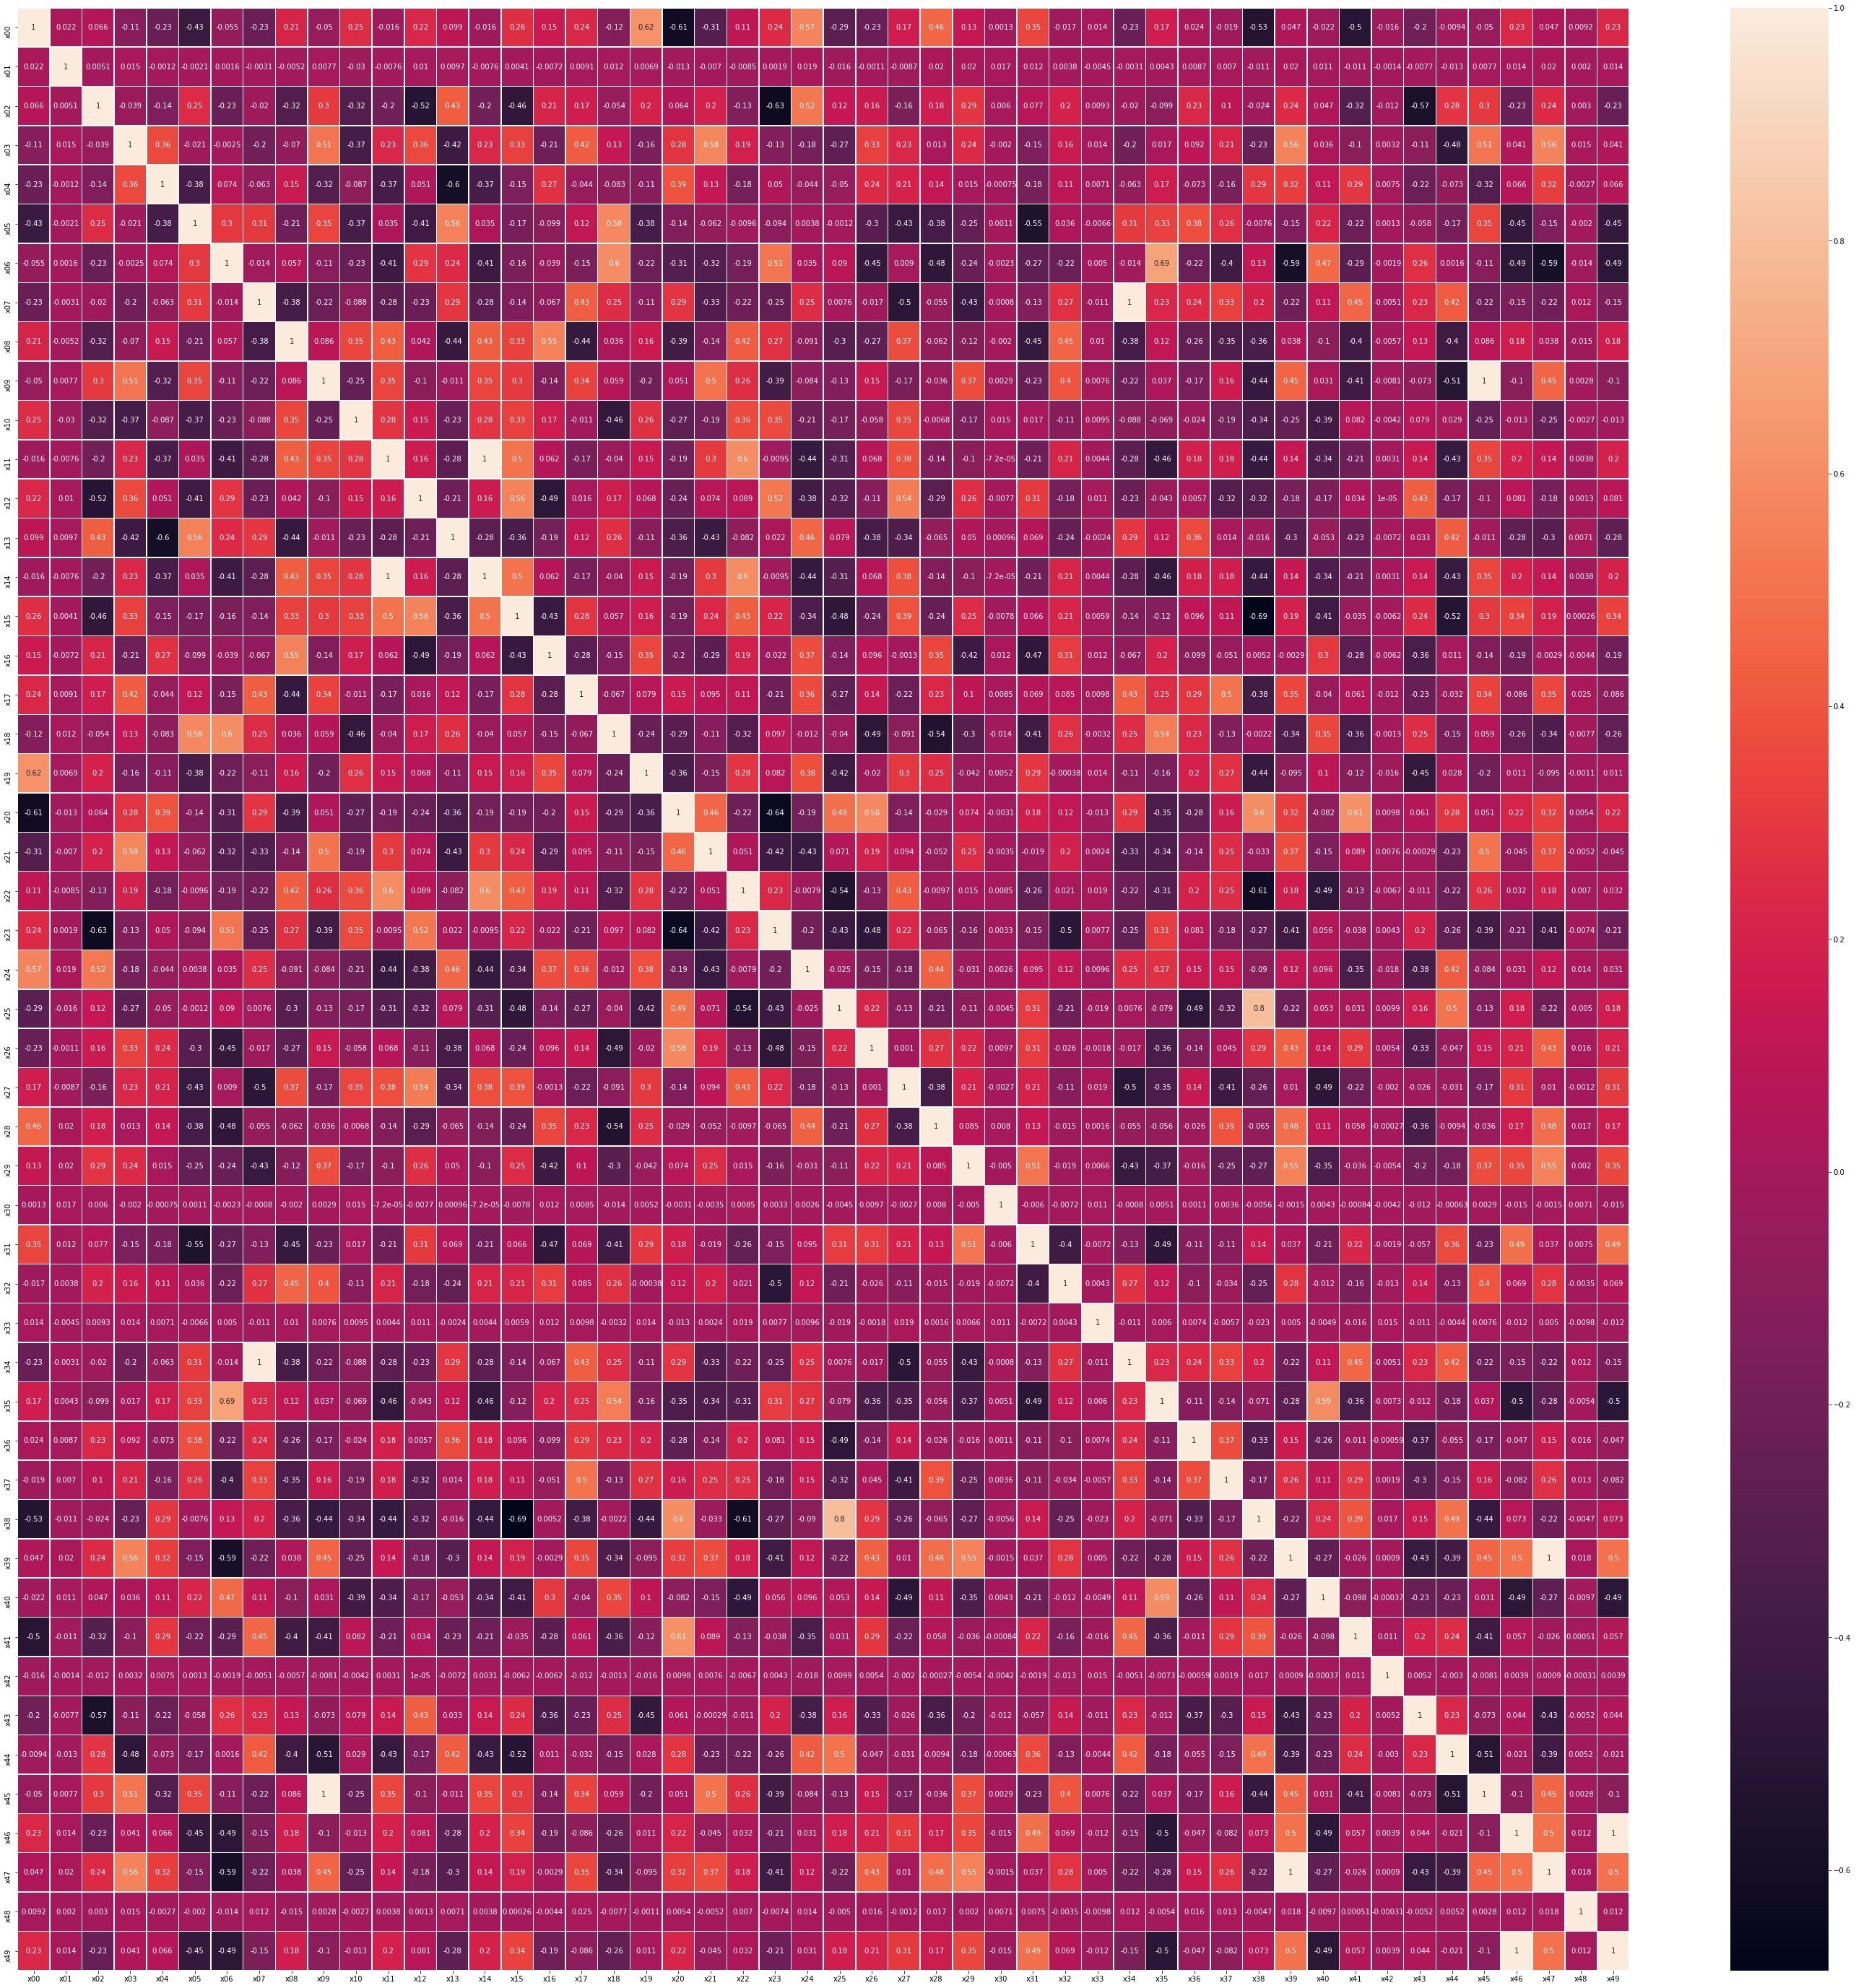

In [8]:
import matplotlib.pyplot as plt
corr = X.corr()
fig, ax = plt.subplots(figsize=(50,50))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

'''
Features I liked
x07,x09,x11,x14,x25,x34,x38,x39,x45,x47
'''

In [2]:
X=X[['x07','x09','x11','x14','x25','x34','x38','x39','x45','x47']]
#Spliting it for the classifier

xtrain, xtest, ytrain, ytest = train_test_split(X , Y, test_size=0.7, random_state=100)

print(X.columns)

Index(['x07', 'x09', 'x11', 'x14', 'x25', 'x34', 'x38', 'x39', 'x45', 'x47'], dtype='object')


In [3]:
# create first hidden layer
act = 'linear'
model = keras.Sequential()
model.add(keras.layers.Dense(xtrain.shape[1], input_dim=xtrain.shape[1], activation=act))
    
model.add(keras.layers.Dense(10, activation=act))
    
# add dropout, default is none
model.add(keras.layers.Dropout(0.3))
    
model.add(keras.layers.Dense(10, activation=act))

model.add(keras.layers.Dense(4,tf.nn.softmax))  # output layer

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

training = model.fit(xtrain, ytrain, epochs=10,batch_size=32, validation_split=0.2, verbose=1)
val_acc = np.mean(training.history['val_acc'])

print("Validation Accuracy:",val_acc)

test_predict=model.predict(xtest)
print(test_predict)
res =[]
for i in range(len(test_predict)):
  res.append(np.argmax(test_predict[i]))
print(res)
print("Accuracy:",metrics.accuracy_score(res,ytest)*100)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 44        
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
None
Train on 2400 samples, validate on 600

In [4]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=2, random_state=0)
model.fit(xtrain, ytrain)
test_predict=model.predict(xtest)
print("Accuracy:",metrics.accuracy_score(test_predict,ytest)*100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 43.28571428571429


In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "gini",random_state =100,max_depth=3, min_samples_leaf=5)
model.fit(xtrain, ytrain)
test_predict=model.predict(xtest)
print("Accuracy:",metrics.accuracy_score(test_predict,ytest)*100)

Accuracy: 44.08571428571428


In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain, ytrain)
test_predict=model.predict(xtest)
print("Accuracy:",metrics.accuracy_score(test_predict,ytest)*100)

Accuracy: 40.51428571428571


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
